In [122]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [70]:
train_df = pd.read_csv('House_prices_Kagle/train.csv', index_col='Id')
test_df = pd.read_csv('House_prices_Kagle/test.csv', index_col='Id')

In [65]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [66]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [106]:
train_df.dtypes[train_df.dtypes != 'object']


MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [206]:
# Create list to drop
del(to_drop)
to_drop = []

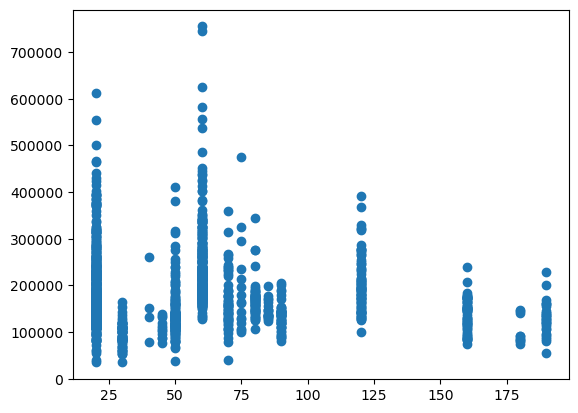

In [109]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

In [120]:
np.sort(train_df['MSSubClass'].unique())

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190], dtype=int64)

In [154]:
train_df.query('MSSubClass == 40')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,152000
590,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,600,8,2008,WD,Normal,79500
874,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000
1271,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,260000


In [156]:
stats.zscore(train_df['MSSubClass'].dropna()).sort_values().tail(10)
#nothing to drop so far, maybe later

Id
1031    3.147673
1417    3.147673
970     3.147673
536     3.147673
336     3.147673
521     3.147673
1267    3.147673
49      3.147673
1063    3.147673
862     3.147673
Name: MSSubClass, dtype: float64

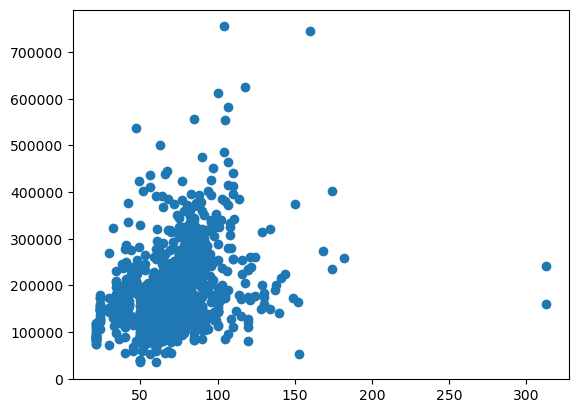

In [82]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

In [181]:
train_df.query('LotFrontage > 155').index

Index([198, 232, 935, 1108, 1128, 1183, 1299], dtype='int64', name='Id')

In [175]:
stats.zscore(train_df['LotFrontage'].dropna()).sort_values().tail(7)

Id
1183     3.705515
1108     4.035077
232      4.282249
198      4.282249
1128     4.611811
935     10.008389
1299    10.008389
Name: LotFrontage, dtype: float64

In [207]:
for x in train_df.query('LotFrontage > 155').index:
    to_drop.append(x)
to_drop

[198, 232, 935, 1108, 1128, 1183, 1299]

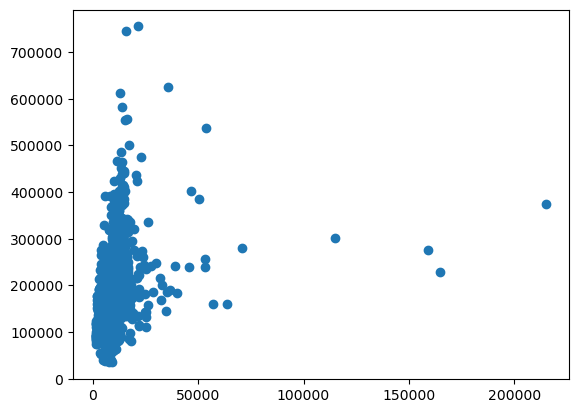

In [88]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)

In [212]:
train_df.query('LotArea > 50000').index
# a lot to drop

Index([54, 250, 314, 336, 385, 452, 458, 707, 770, 1299, 1397], dtype='int64', name='Id')

In [214]:
stats.zscore(train_df['LotArea']).sort_values().tail(7).index
# Huge z-score, lets drop up to 1396 so 7 rows


Index([1397, 1299, 452, 707, 250, 336, 314], dtype='int64', name='Id')

In [215]:
for x in stats.zscore(train_df['LotArea']).sort_values().tail(7).index:
    to_drop.append(x)
to_drop

[198, 232, 935, 1108, 1128, 1183, 1299, 1397, 1299, 452, 707, 250, 336, 314]

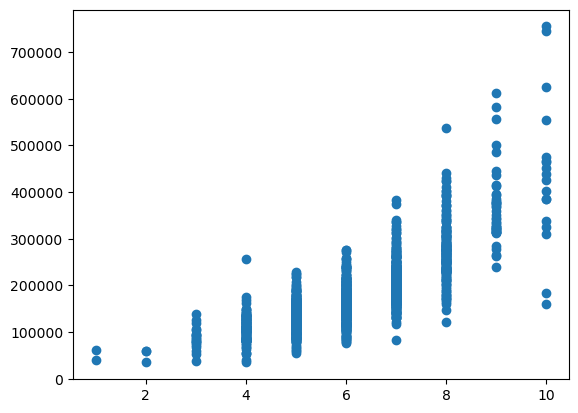

In [91]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [218]:
train_df.query('OverallQual == 10 & SalePrice < 250000').index
#To drop 524, 1299
for x in train_df.query('OverallQual == 10 & SalePrice < 250000').index:
    to_drop.append(x)

In [225]:
train_df.query('OverallQual == 4 & SalePrice > 200000')
# to drop 458
to_drop.append('458')

In [234]:
train_df.query('OverallQual == 8 & SalePrice > 500000').index

Index([770], dtype='int64', name='Id')

In [235]:
to_drop.append('770')

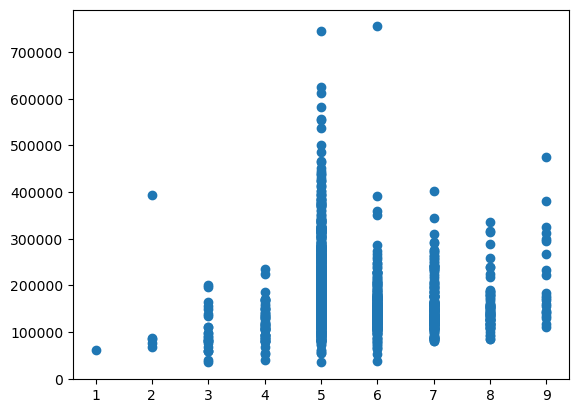

In [99]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In [239]:
drop_data = train_df.query('OverallCond == 2 & SalePrice > 350000 | OverallCond == 5 & SalePrice > 700000 | OverallCond == 6 & SalePrice > 700000 | OverallCond == 1 | OverallCond == 9 & SalePrice > 400000').index

In [241]:
for x in drop_data:
    to_drop.append(x)
del drop_data

NameError: name 'drop_data' is not defined

In [242]:
to_drop

[198,
 232,
 935,
 1108,
 1128,
 1183,
 1299,
 1397,
 1299,
 452,
 707,
 250,
 336,
 314,
 524,
 1299,
 '458',
 '770',
 186,
 376,
 379,
 692,
 1183]

In [245]:
to_drop[-6] = int(to_drop[-6])

In [246]:
to_drop[-7] = int(to_drop[-7])

In [248]:
to_drop

[198,
 232,
 935,
 1108,
 1128,
 1183,
 1299,
 1397,
 1299,
 452,
 707,
 250,
 336,
 314,
 524,
 1299,
 458,
 770,
 186,
 376,
 379,
 692,
 1183]

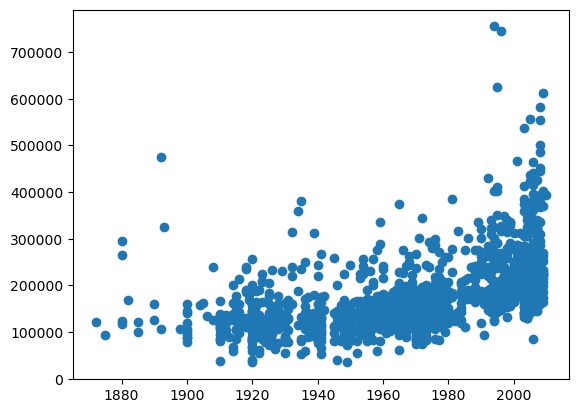

In [250]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [255]:
train_df.query('YearBuilt < 1920 & SalePrice > 260000').index

Index([186, 305, 584, 748], dtype='int64', name='Id')

In [256]:
for x in train_df.query('YearBuilt < 1920 & SalePrice > 260000').index:
    to_drop.append(x)

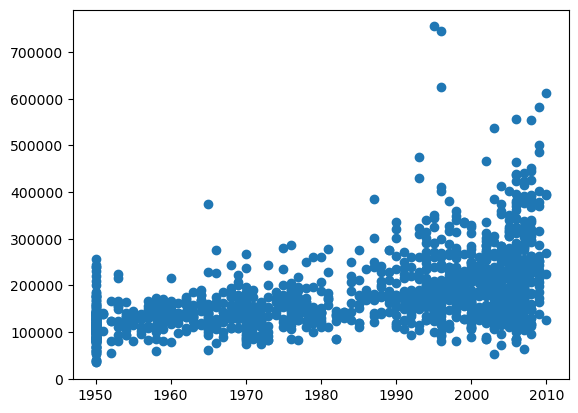

In [261]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [263]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000 | YearRemodAdd < 2000 & SalePrice > 600000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [264]:
for x in train_df.query('YearRemodAdd < 1970 & SalePrice > 300000 | YearRemodAdd < 2000 & SalePrice > 600000').index:
    to_drop.append(x)


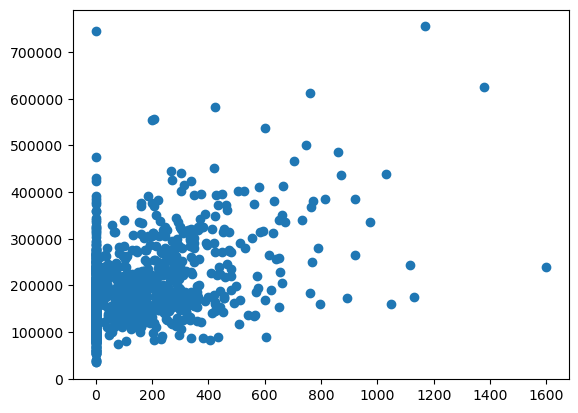

In [265]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [ ]:
train_df.query('MasVnrArea > 1300')

In [266]:
for x in train_df.query('MasVnrArea > 1300').index:
    to_drop.append(x)

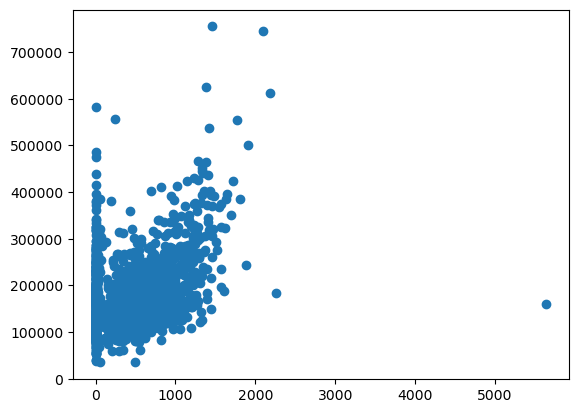

In [267]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [269]:
train_df.query('BsmtFinSF1 > 5000')
to_drop.append(1299)

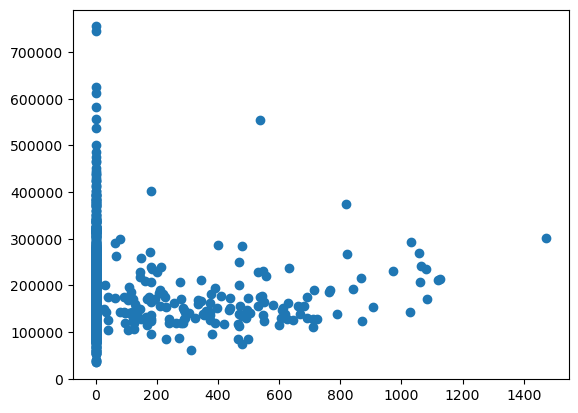

In [271]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [272]:
train_df.query('BsmtFinSF2 > 1400 | BsmtFinSF2 > 400 & SalePrice > 500000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000
441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [273]:
to_drop.append(323)
to_drop.append(441)


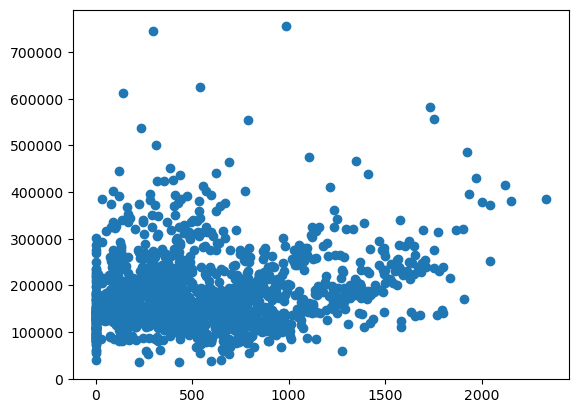

In [275]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)
#pretty ok 

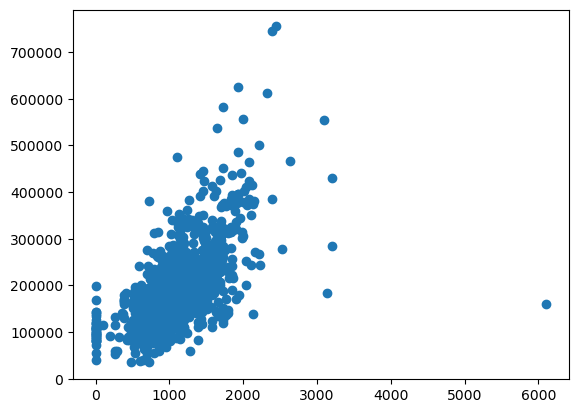

In [276]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)
#pretty ok 

In [277]:
train_df.query('TotalBsmtSF > 3000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [278]:
for x in train_df.query('TotalBsmtSF > 3000').index:
    to_drop.append(x)

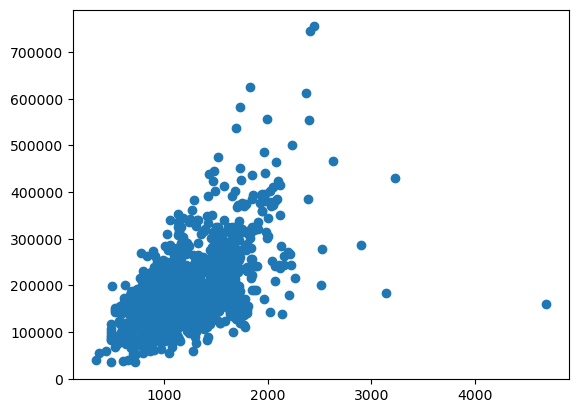

In [279]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)


In [286]:
train_df[train_df['1stFlrSF'] > 2700]

Index([497, 524, 1025, 1299], dtype='int64', name='Id')

In [287]:
for x in train_df[train_df['1stFlrSF'] > 2700].index:
    to_drop.append(x)

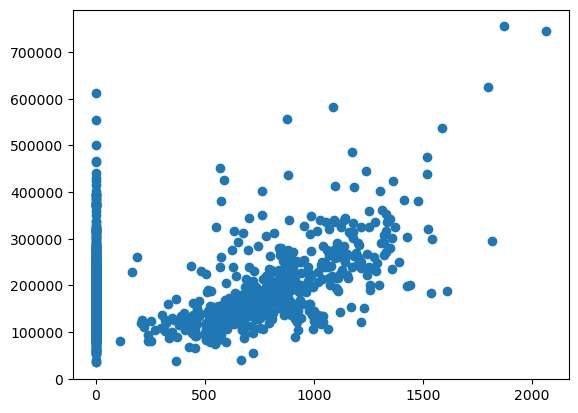

In [288]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)
#pretty good

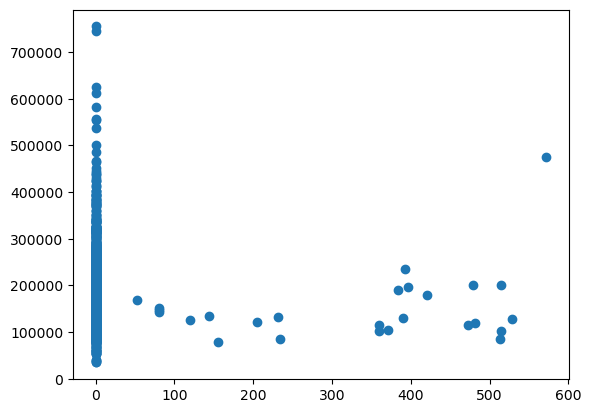

In [289]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)


In [290]:
train_df[train_df['LowQualFinSF'] > 560]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [291]:
to_drop.append(186)

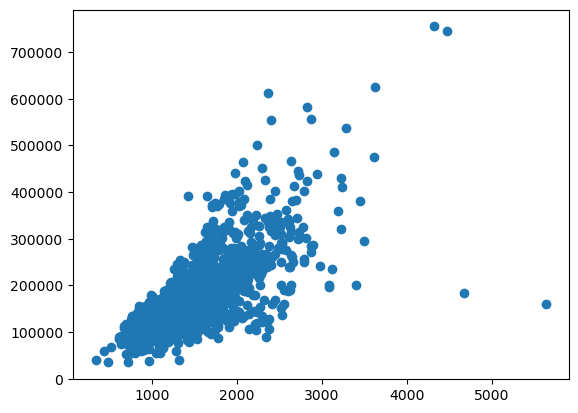

In [292]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)

In [293]:
train_df.query('GrLivArea > 4000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [294]:
for x in train_df.query('GrLivArea > 4000').index:
    to_drop.append(x)

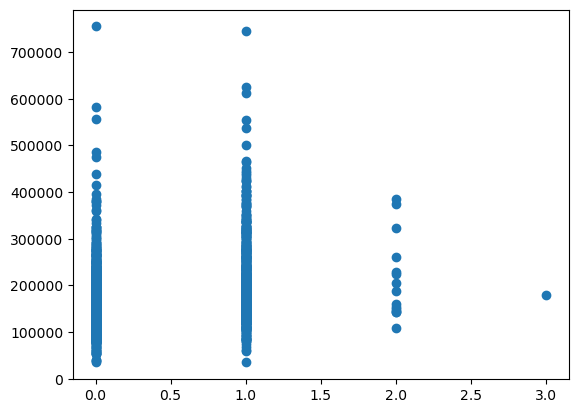

In [295]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

In [296]:
train_df.query('BsmtFullBath == 3')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [297]:
to_drop.append(739)

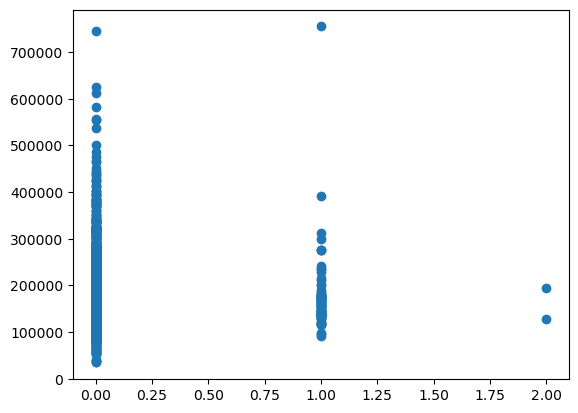

In [298]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)


In [301]:
train_df.query('BsmtHalfBath == 1 & SalePrice > 500000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [303]:
train_df.query('BsmtHalfBath == 1 & SalePrice > 500000').index in to_drop


True

In [305]:
train_df.query('BsmtHalfBath == 2')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [309]:
stats.zscore(train_df['BsmtHalfBath']).sort_values().tail(10)
#need to drop 598 and 955 which correspond to the 2 values of feature

Id
246     3.948809
559     3.948809
1124    3.948809
1288    3.948809
427     3.948809
1007    3.948809
250     3.948809
359     3.948809
598     8.138680
955     8.138680
Name: BsmtHalfBath, dtype: float64

In [310]:
to_drop.append(955)
to_drop.append(598)

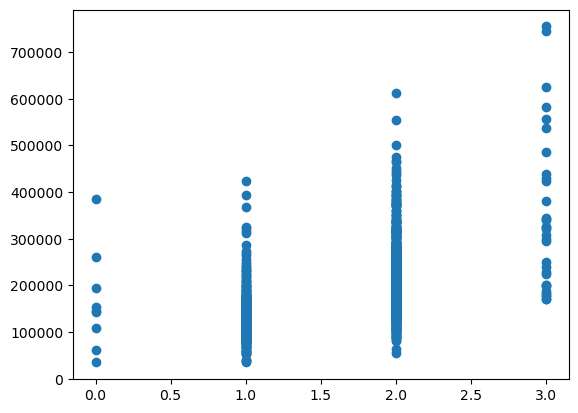

In [313]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)
#pretty ok

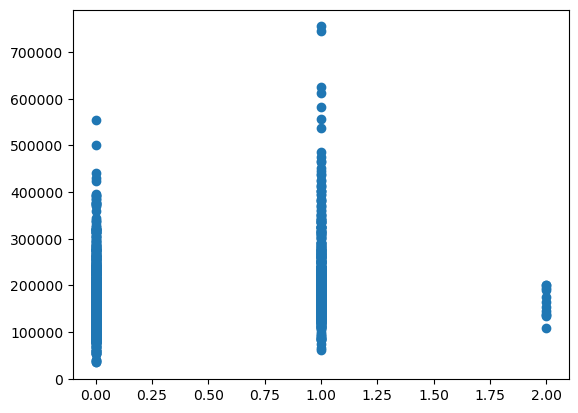

In [314]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_df)
#pretty ok

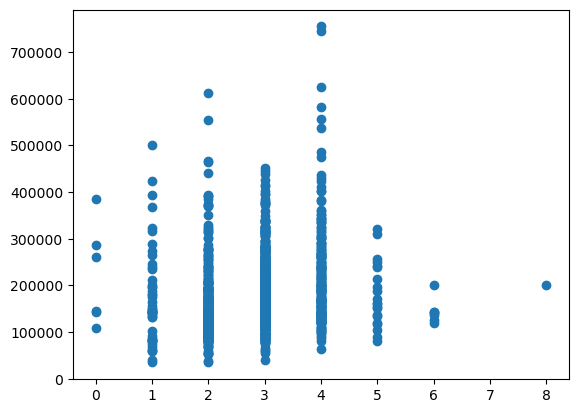

In [315]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)
#maybe 8 or even 6

In [318]:
train_df.query('BedroomAbvGr > 5')
#we need to check zscore

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
145,90,RM,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,ConLI,Abnorml,125000
292,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,135900
331,90,RL,NaN,10624,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,119000
571,90,RL,74.0,13101,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,142600
636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
844,90,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,141000
898,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,142953
1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


In [320]:
stats.zscore(train_df['BedroomAbvGr']).sort_values().tail(10)
#not bad, to drop 636

Id
884     2.616266
911     2.616266
844     3.842510
1351    3.842510
571     3.842510
145     3.842510
292     3.842510
898     3.842510
331     3.842510
636     6.294997
Name: BedroomAbvGr, dtype: float64

In [321]:
to_drop.append(636)

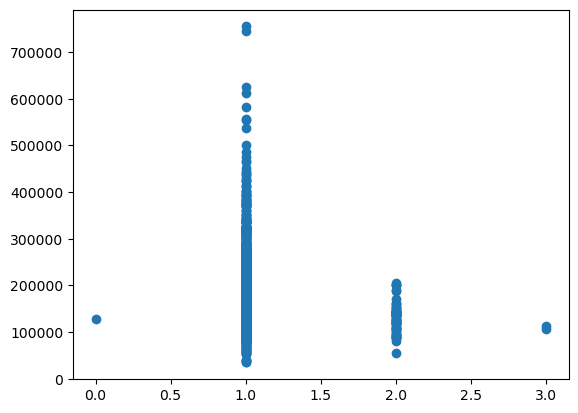

In [322]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)
#to drop 0 and 3.0 all

In [323]:
train_df.query('KitchenAbvGr == 0 | KitchenAbvGr == 3.0')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [326]:
for x in train_df.query('KitchenAbvGr == 0 | KitchenAbvGr == 3.0').index:
    to_drop.append(x)

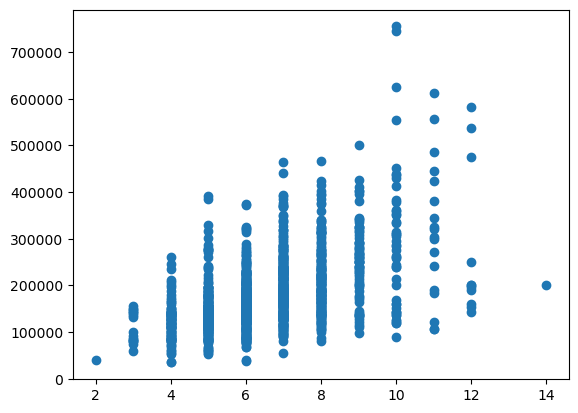

In [328]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)
# for sure 2 and 14, maybe something from 12

In [329]:
train_df.query('TotRmsAbvGrd == 2 | TotRmsAbvGrd == 14')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [330]:
to_drop.append(534)
to_drop.append(636)

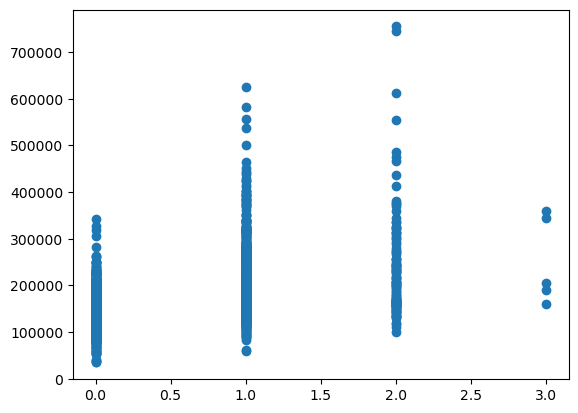

In [332]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)
#pretty ok 

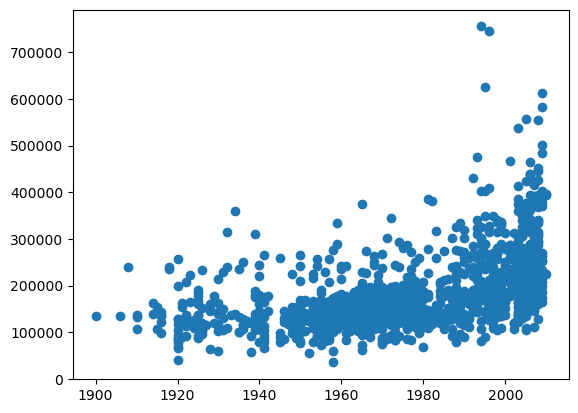

In [333]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)
#pretty ok 

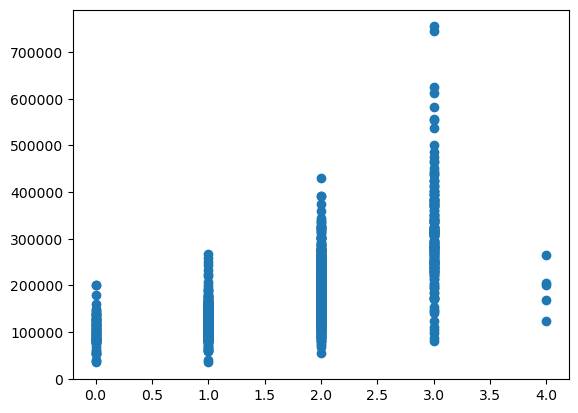

In [337]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)

In [335]:
train_df.query('GarageCars == 4.0')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


In [336]:
for x in train_df.query('GarageCars == 4.0').index:
    to_drop.append(x)

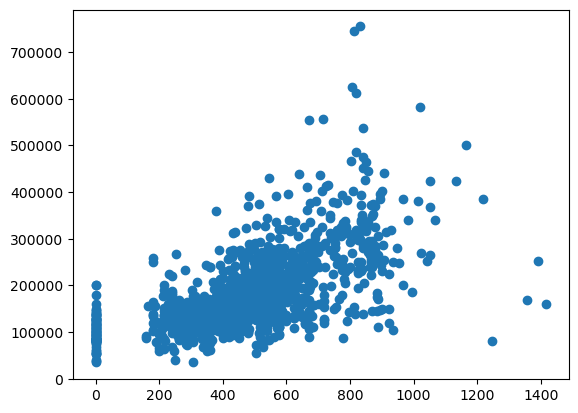

In [341]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_df)

In [339]:
train_df.query('GarageArea > 1200')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [340]:
for x in train_df.query('GarageArea > 1200').index:
    to_drop.append(x)

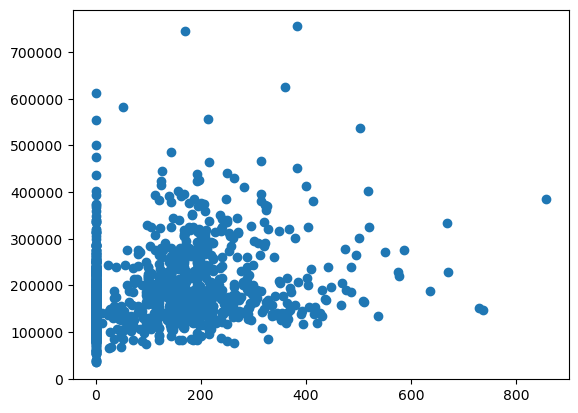

In [342]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)

In [343]:
train_df.query('WoodDeckSF > 600')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
1069,160,RM,42.0,3964,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,151400
1211,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal,189000
1314,60,RL,108.0,14774,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,333168
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [344]:
stats.zscore(train_df['WoodDeckSF']).sort_values().tail(10)

Id
962     3.637434
170     3.828981
65      3.844943
1424    3.924754
1211    4.315829
1314    4.579205
336     4.595168
1069    5.058072
1460    5.121921
54      6.087635
Name: WoodDeckSF, dtype: float64

In [345]:
to_drop.append(54)

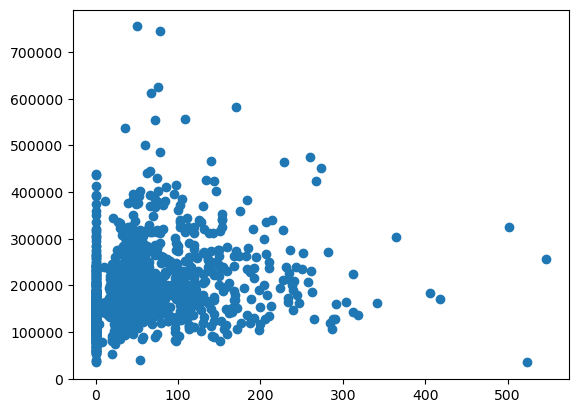

In [346]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_df)

In [349]:
stats.zscore(train_df['OpenPorchSF']).sort_values().tail(3)
#to_drop 3 last

Id
584     6.874782
496     7.191843
1329    7.554198
Name: OpenPorchSF, dtype: float64

In [350]:
for x in stats.zscore(train_df['OpenPorchSF']).sort_values().tail(3).index:
    to_drop.append(x)


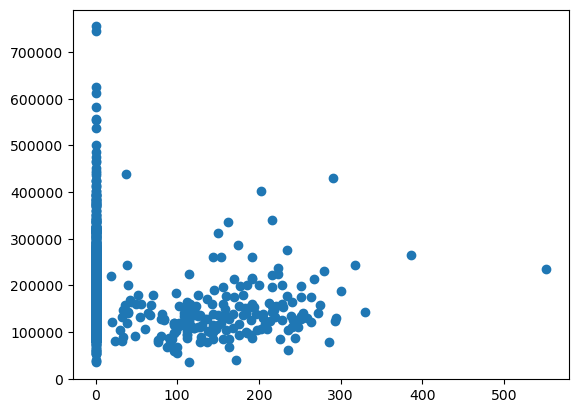

In [351]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_df)

In [352]:
train_df.query('EnclosedPorch > 380')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979


In [353]:
to_drop.append(748)
to_drop.append(198)

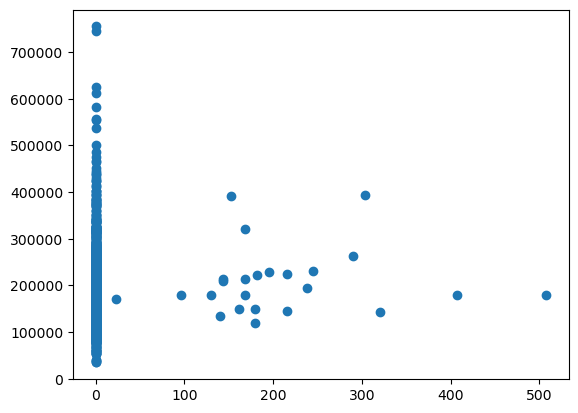

In [355]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=train_df)
#not many data, not to include?

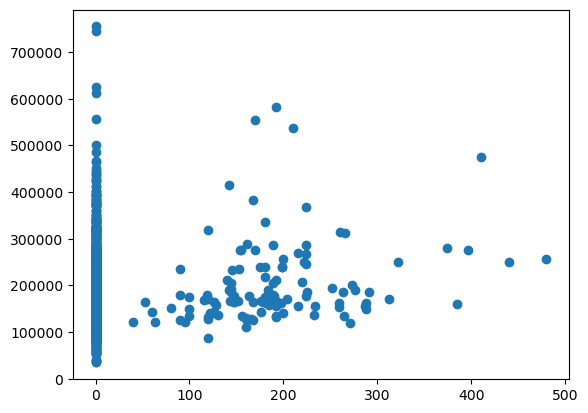

In [356]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=train_df)
#not many data, not to include?

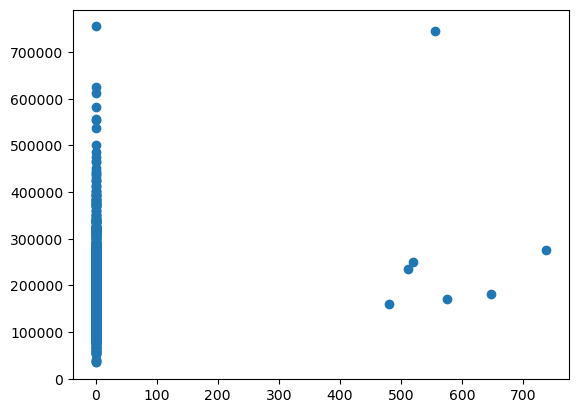

In [357]:
plt.scatter(x='PoolArea', y='SalePrice', data=train_df)
#not many data, not to include?

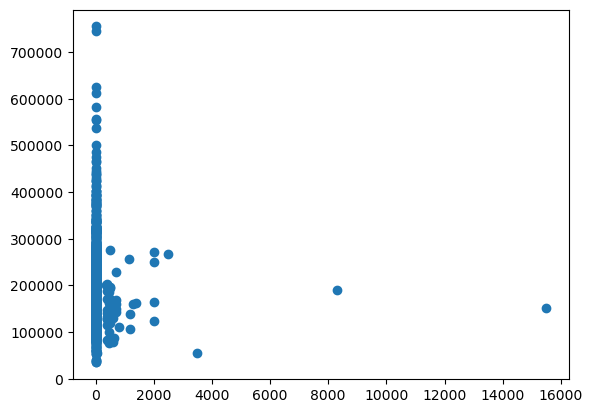

In [359]:
plt.scatter(x='MiscVal', y='SalePrice', data=train_df)
#not many data, not to include?ac

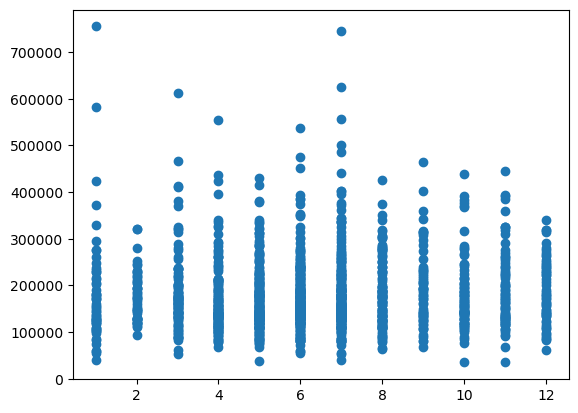

In [361]:
plt.scatter(x='MoSold', y='SalePrice', data=train_df)
#good

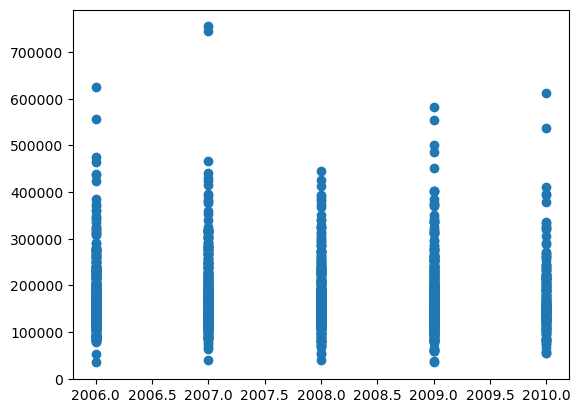

In [364]:
plt.scatter(x='YrSold', y='SalePrice', data=train_df)
#no correlation

In [365]:
#Lets delete the duplicates
to_drop = set(to_drop)

In [369]:
to_drop

{49,
 54,
 186,
 198,
 232,
 250,
 298,
 305,
 314,
 323,
 333,
 336,
 376,
 379,
 421,
 441,
 452,
 458,
 496,
 497,
 524,
 534,
 582,
 584,
 598,
 636,
 692,
 707,
 739,
 748,
 770,
 810,
 826,
 935,
 955,
 1025,
 1062,
 1108,
 1128,
 1170,
 1183,
 1191,
 1299,
 1329,
 1341,
 1351,
 1397}

In [370]:
len(to_drop)


47

In [374]:
train_df.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour U

In [378]:
# Let's drop outliers frotm the data training set
train_df.index.isin(to_drop) == False

array([ True,  True,  True, ...,  True,  True,  True])